# Reading Activity 15 - Advanced Topics in Bayesian Linear Regression

## Objectives

+ Use the evidence approximation to estimate regression parameters that are not weights, e.g., noise variance and hyper-parameters affecting the priors of the weights
+ Use automatic relevance determination to select which basis functions to keep in a generalized linear model
+ Use standardized errors and quantile-quantile plots to assess the quality of the posterior point-predictive distribution of a regression model

## Probabilistic regression IV (The evidence approximation)

Using Bayesian linear regression we were able to quantify epistemic uncertainty induced by limited data.
The method was quite powerful but we had to pick the precision $\alpha$ of the weights, the measurement noise variance $\sigma^2$ by hand, or any parameters of the basis functions such us the lengthscale $\ell$ of the radial basis functions.
The *evidence approximation* enables us to identify these parameters using the data.

Typically, we call all these parameters **hyper-parameters** of the model.
For convenience, let us denote all the hyper-parameters by $\theta$:
$$
\boldsymbol{\theta} = \{\sigma, \alpha, \ell,\dots\}.
$$
Like before, our model is:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$
with data likelihood:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \boldsymbol{\theta} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \boldsymbol{\theta}).
$$
The prior of the weights is:
$$
\mathbf{w} | \boldsymbol{\theta} \sim p(\mathbf{w}| \boldsymbol{\theta}).
$$
However, we now have to add a *hyper-prior*:
$$
\boldsymbol{\theta} \sim p(\boldsymbol{\theta}).
$$

Graphically:

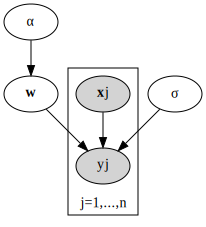

In [2]:
from graphviz import Digraph
g2 = Digraph('full_bayes_regression_2')
g2.node('alpha', label='<&alpha;>')
g2.node('w', label='<<b>w</b>>')
g2.node('sigma', label='<&sigma;>')
with g2.subgraph(name='cluster_0') as sg:
    sg.node('xj', label='<<b>x</b><sub>j</sub>>', style='filled')
    sg.node('yj', label='<y<sub>j</sub>>', style='filled')
    sg.attr(label='j=1,...,n')
    sg.attr(labelloc='b')
g2.edge('alpha', 'w')
g2.edge('sigma', 'yj')
g2.edge('w', 'yj')
g2.edge('xj', 'yj')
g2.render('full_bayes_regression_2', format='png')
g2

Notice that now $\alpha$ and $\sigma$ are not shaded because we do not fix them.

If we wanted to be fully Bayesian, we would just write down the posterior of everything:
$$
p(\mathbf{w}, \boldsymbol{\theta}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n}) \propto p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})p(\boldsymbol{\theta}).
$$
and, somehow, sample from it... We do not know yet how to do this.
We will learn how to do this in Lecture 27 and 28.
Here we will develop an approximation to fully Bayesian inference.

### The Evidence Approximation
Look at the marginal posterior of $\boldsymbol{\theta}$:
$$
p(\boldsymbol{\theta}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n}) \propto 
\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\mathbf{w}.
$$
Assume that the hyper-prior is relatively flat:
$$
p(\boldsymbol{\theta}) \propto 1.
$$
Then use a maximum a posteriori estimate for $\boldsymbol{\theta}$:
$$
\boldsymbol{\theta}_{\mbox{EV}} = \arg\max_{\boldsymbol{\theta}}\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})d\mathbf{w}.
$$
The nice thing is that the integral on the right-hand-side is analytically available for Gaussian likelihood and prior.
This is the *evidence approximation* of the hyper-parameters.

### Examples

After watching the video, see [Hands-on Activity 15.1](https://colab.research.google.com/github/PredictiveScienceLab/data-analytics-se/blob/master/activities/hands-on-15.1.ipynb).

## Probabilistic regression V (Automatic relevance determination)

The evidence approximation gave us a way to estimate the hyper-parameters.
We now look at the problem of figuring out which basis functions to keep and which not.
The idea is to use a different precision $\alpha_i$ for each weight.
That is, the prior of the weight $w_j$ corresponding to the basis function $\phi_i(\mathbf{x})$ is: 
$$
p(w_i | \alpha_i) \propto \exp\left\{-\alpha_iw_i^2\right\}.
$$
Graphically, the model is as follows:

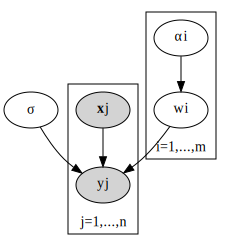

In [3]:
g3 = Digraph('full_bayes_regression_3')
g3.node('sigma', label='<&sigma;>')
with g3.subgraph(name='cluster_0') as sg:
    sg.node('xj', label='<<b>x</b><sub>j</sub>>', style='filled')
    sg.node('yj', label='<y<sub>j</sub>>', style='filled')
    sg.attr(label='j=1,...,n')
    sg.attr(labelloc='b')
with g3.subgraph(name='cluster_1') as sg:
    sg.node('alphai', label='<&alpha;<sub>i</sub>>')
    sg.node('wi', label='<w<sub>i</sub>>')
    sg.attr(label='i=1,...,m')
    sg.attr(labelloc='b')

g3.edge('alphai', 'wi')
g3.edge('sigma', 'yj')
g3.edge('wi', 'yj')
g3.edge('xj', 'yj')
g3.render('full_bayes_regression_3', format='png')
g3

Again, we need advanced techniques to carry out full Bayesian inference.
However, we can just apply the evidence approximation to find all the hyper-parameters.
Now, here is what happens in this kind of model.
The precisions of the basis functions that are not needed will automatically become very large and as a consequence, the posteriors of the corresponding basis functions weights will collapse to a delta function centered at zero.

### Examples

After watching the video, see [Hands-on Activity 15.2](https://colab.research.google.com/github/PredictiveScienceLab/data-analytics-se/blob/master/activities/hands-on-15.2.ipynb).